#Goodness-of-fit statistical tests

The notebook implements different methods to provide quantifiable evidence of whether a GEV function fits the underlying data well. We could also use these tests to justify the use of GEVs in modeling extreme events.

These tests are:


1.   K-S (Kolmogorov-Smirnov) Test
2.   Quantile-quantile plot
3.   Visual inspection of the CDFs



## 1. K-S test

K-S test is a common statistical method to perform goodness-of-fit tests. The K-S test might be useful when (1) we wish to test if the underlying distribution of some observation data is close to some common distributions, and (2) we wish to compare the similarities between the distribution of two datasets.

The K-S test is preferable to other popular statistical tests (e.g., T test) as it compares the full distribution of data rather than some statistical moments derived from the distribution.

In our case, we would like to see if the fitted GEVs from the scipy packages ("theoretical" CDF) are close to the empirical distribution ("observed" CDF) or not.



> The simplest explanation of the K-S test is that it quantifies and compares the difference betweeen two CDFs.





In [1]:
# Import packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import kstest, norm
import os

operating_system = 'mac'

if operating_system == 'win':
    os.chdir('C:/Users/fabau/OneDrive/Documents/GitHub/master-project-cleaned/')
elif operating_system == 'curnagl':
    os.chdir('/work/FAC/FGSE/IDyST/tbeucler/default/fabien/repos/cleaner_version/')
else:
    os.chdir('/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/')

Cluster 0


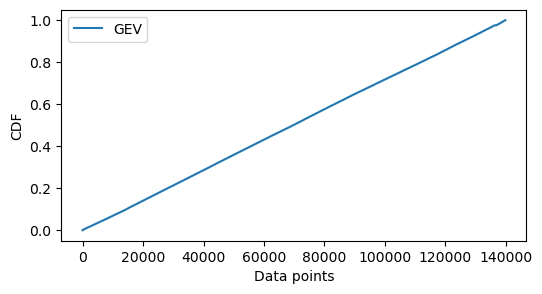

K-S Statistic: 0.0047903377878061315
P-Value: 0.0032632141942290274


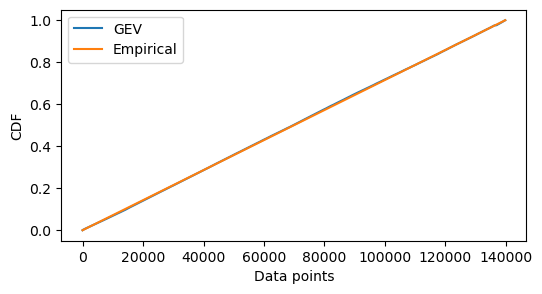

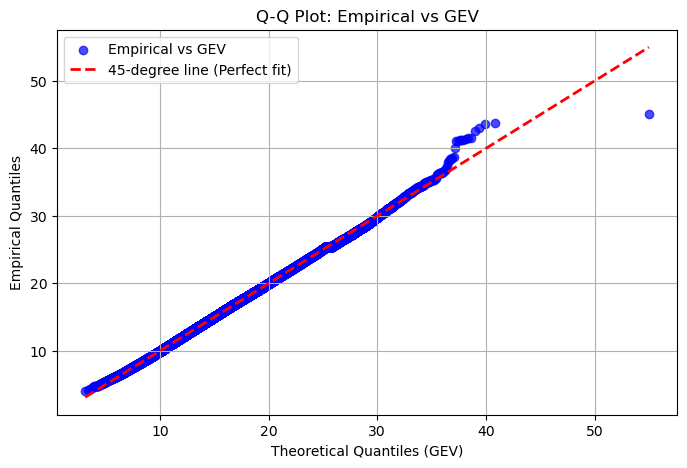

Cluster 1


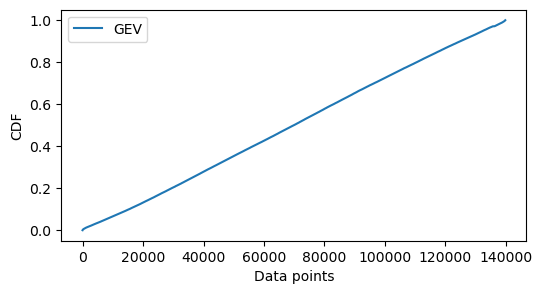

K-S Statistic: 0.010953512309976904
P-Value: 5.383236717062357e-15


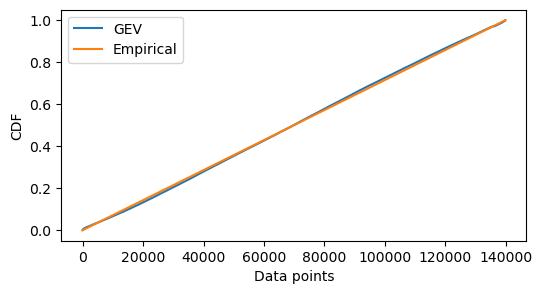

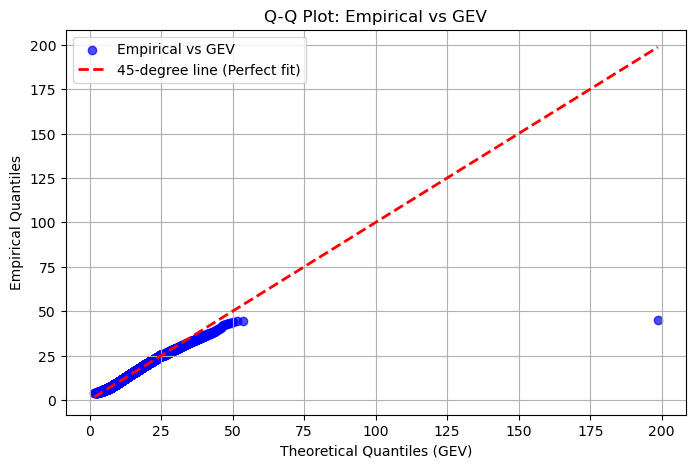

Cluster 2


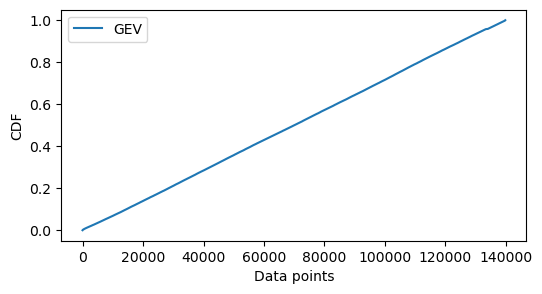

K-S Statistic: 0.005472783492633249
P-Value: 0.00046035798301927644


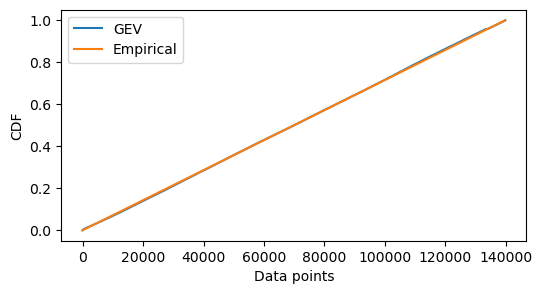

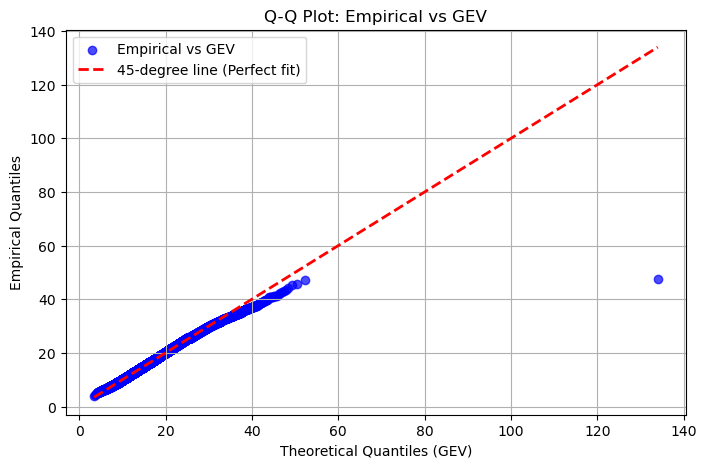

Cluster 3


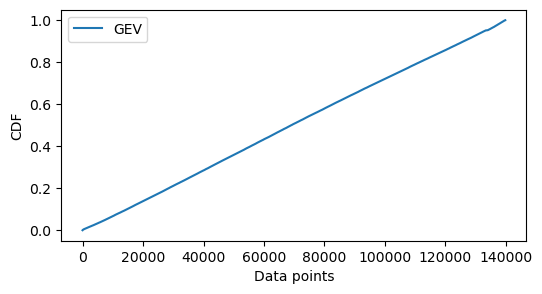

K-S Statistic: 0.008142156677992562
P-Value: 1.777727502526971e-08


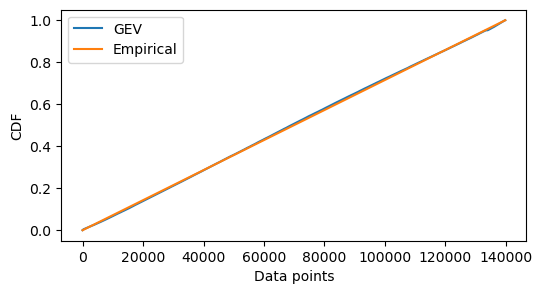

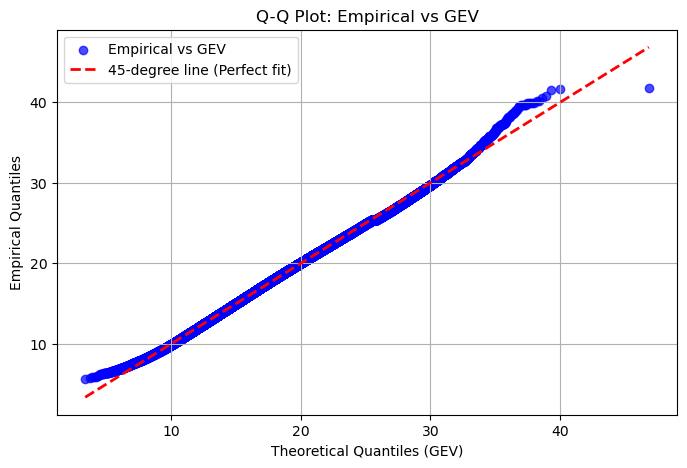

Cluster 4


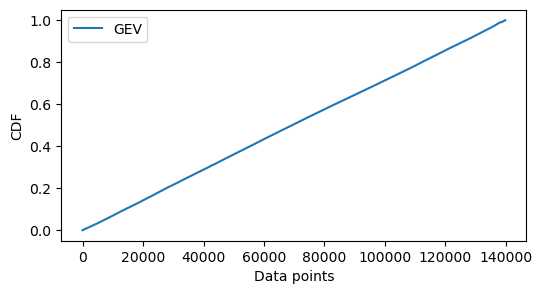

K-S Statistic: 0.00500888074732625
P-Value: 0.001792994046553101


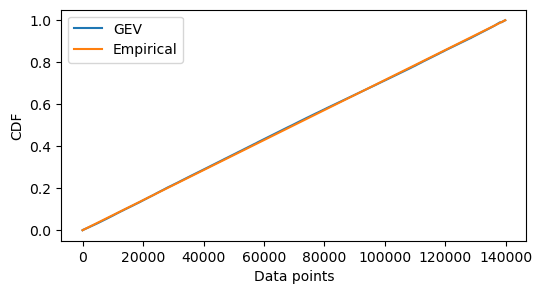

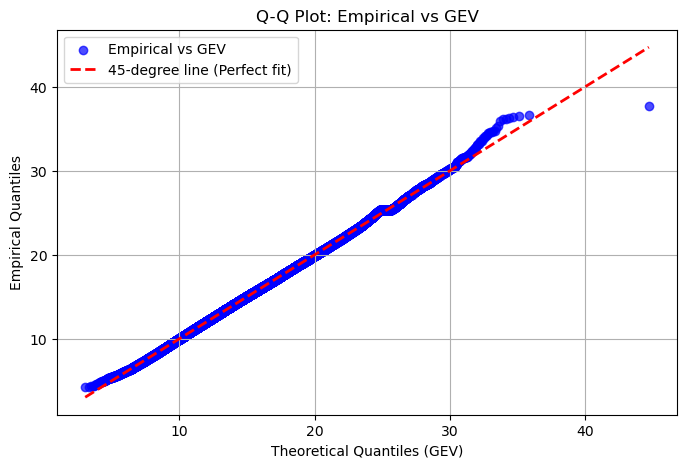

Cluster 5


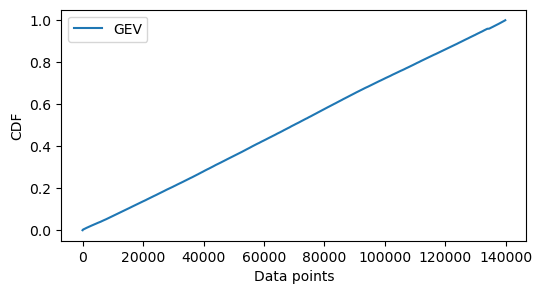

K-S Statistic: 0.009249461049706476
P-Value: 8.154902327560618e-11


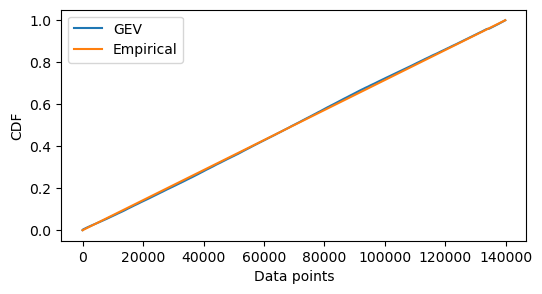

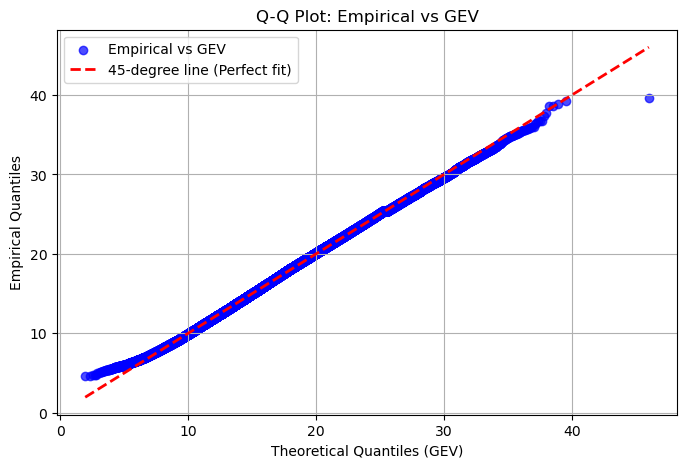

Cluster 6


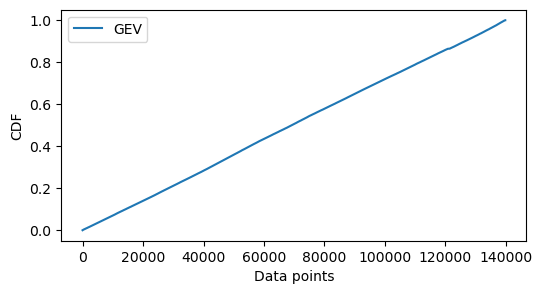

K-S Statistic: 0.007426689472302739
P-Value: 4.003769447429149e-07


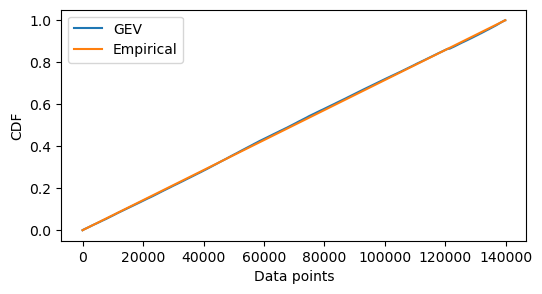

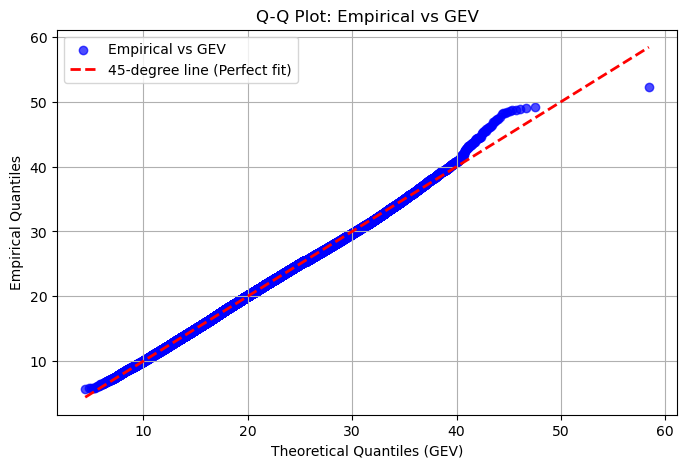

Cluster 7


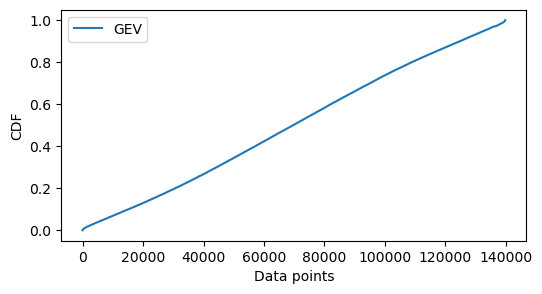

K-S Statistic: 0.022779918153868484
P-Value: 1.930707927867903e-63


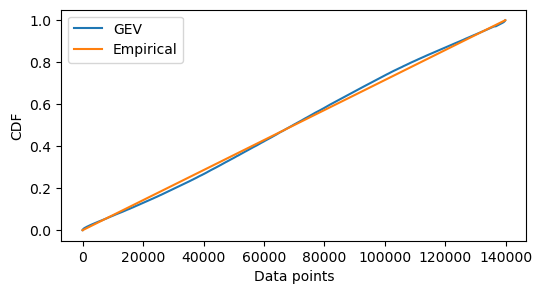

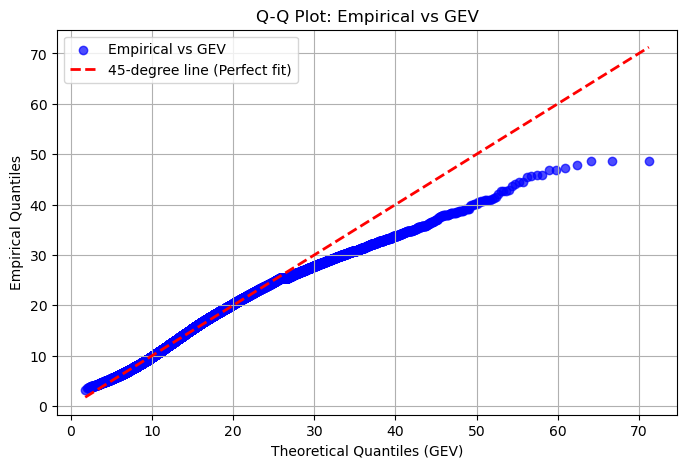

Cluster 8


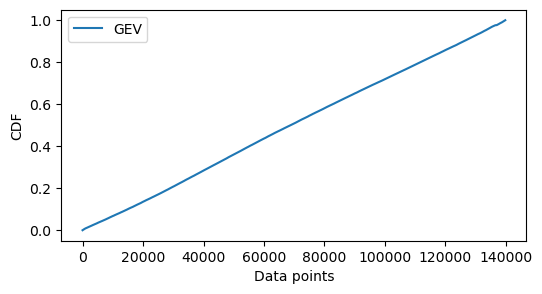

K-S Statistic: 0.009269867688316502
P-Value: 7.33717779766063e-11


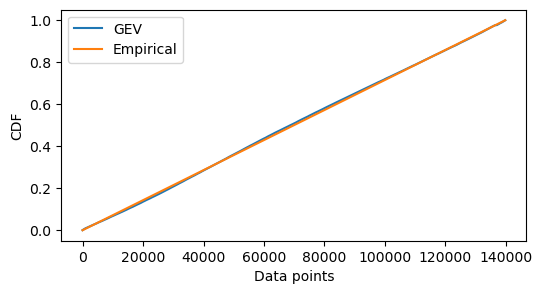

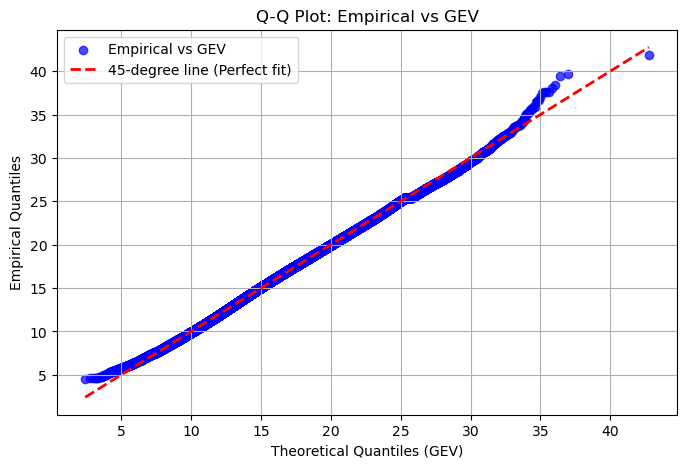

Cluster 9


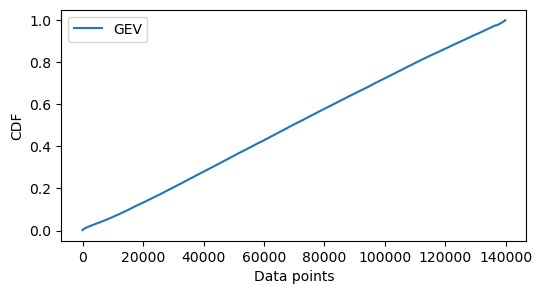

K-S Statistic: 0.010952430107550426
P-Value: 5.4190369940762766e-15


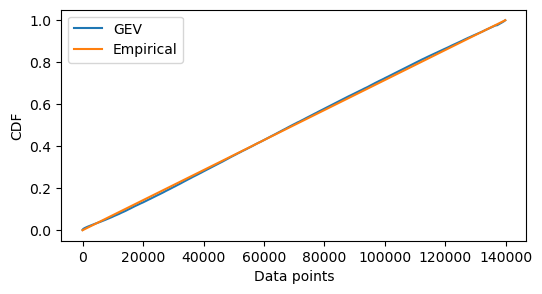

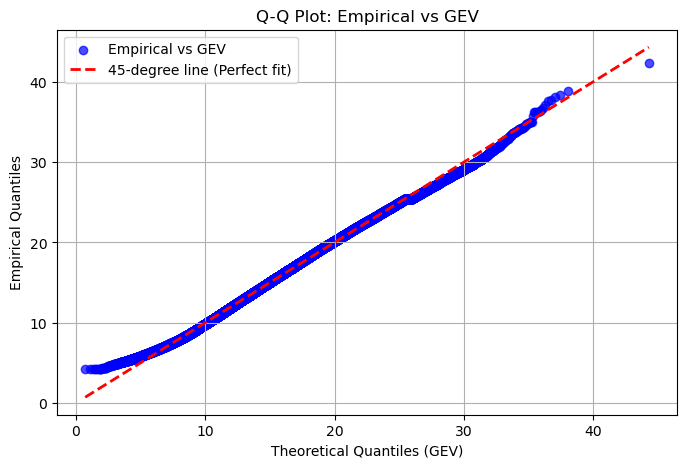

Cluster 10


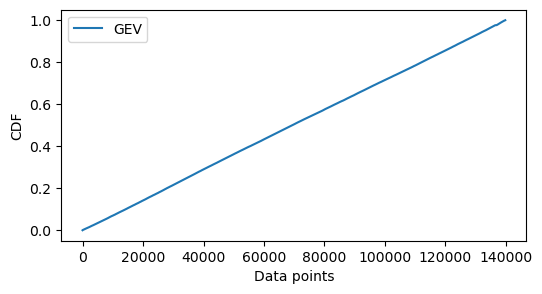

K-S Statistic: 0.004613544513288381
P-Value: 0.005194506444979928


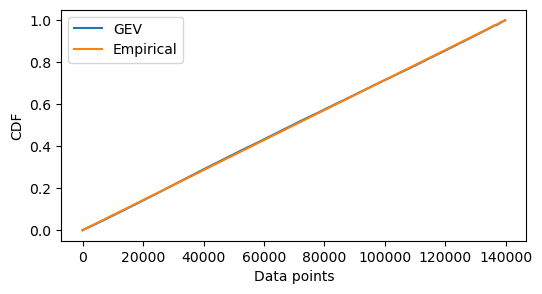

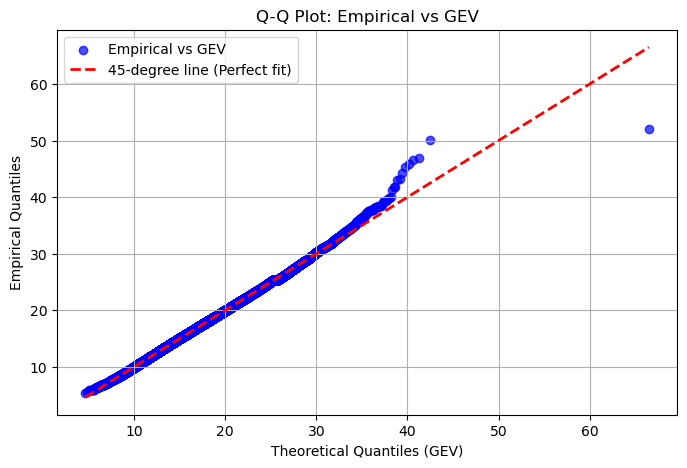

Cluster 11


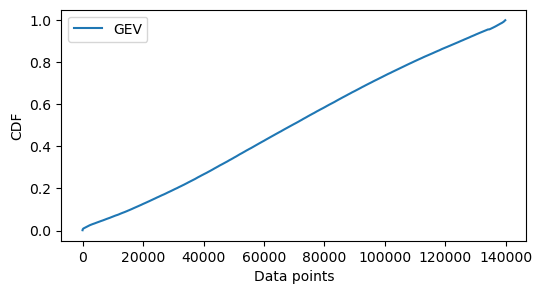

K-S Statistic: 0.022043045191439653
P-Value: 1.9805233909944306e-59


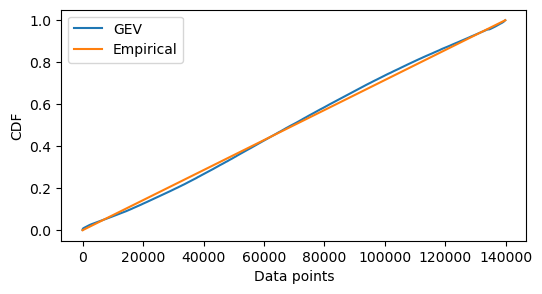

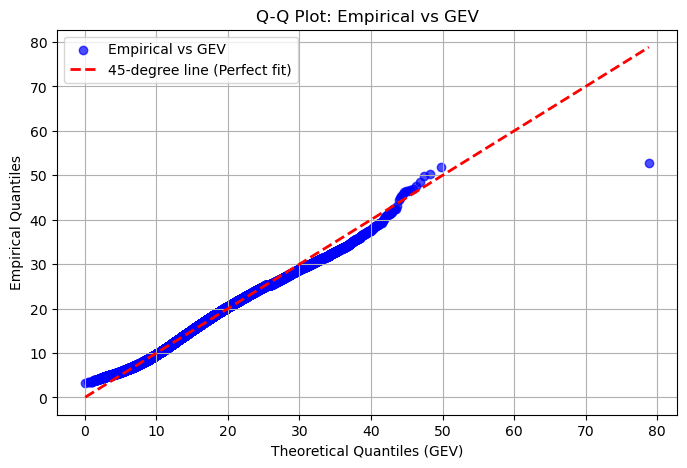

Cluster 12


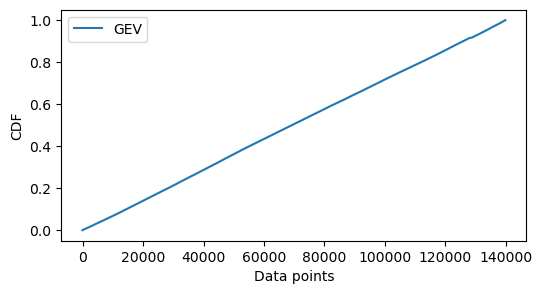

K-S Statistic: 0.006045728066864597
P-Value: 7.272632543321467e-05


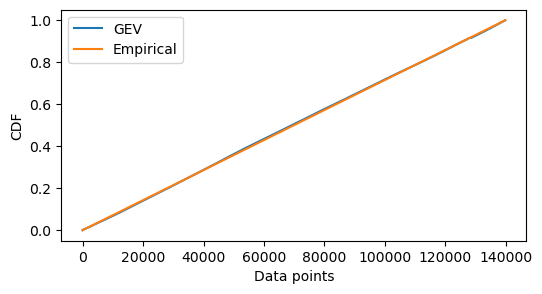

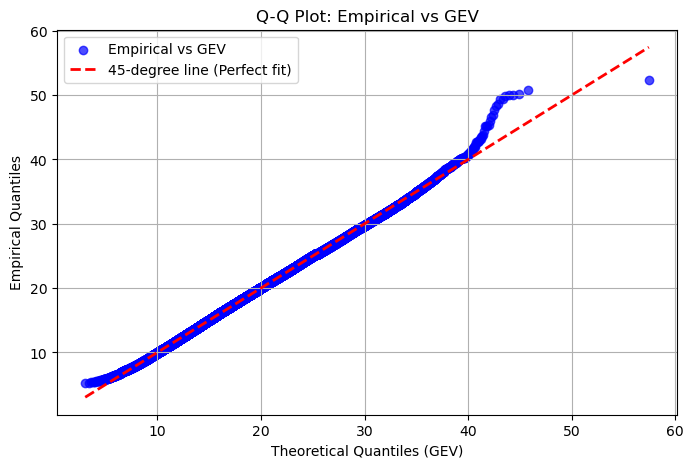

Cluster 13


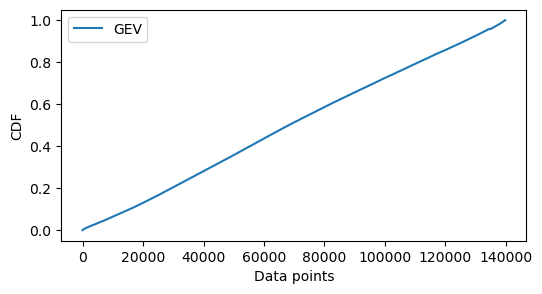

K-S Statistic: 0.014897024770318068
P-Value: 2.2512712000469038e-27


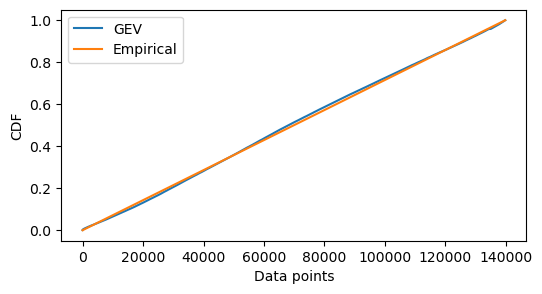

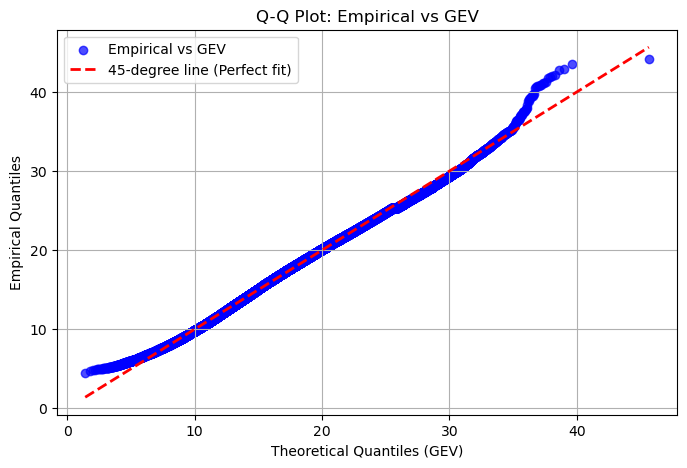

Cluster 14


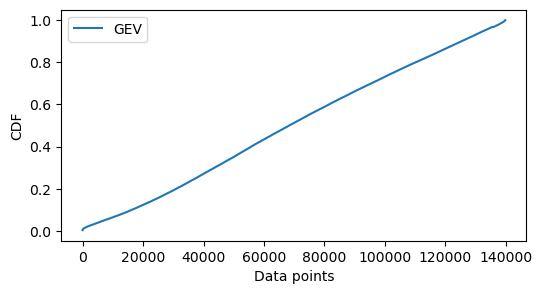

K-S Statistic: 0.022723027380806143
P-Value: 3.981926398021365e-63


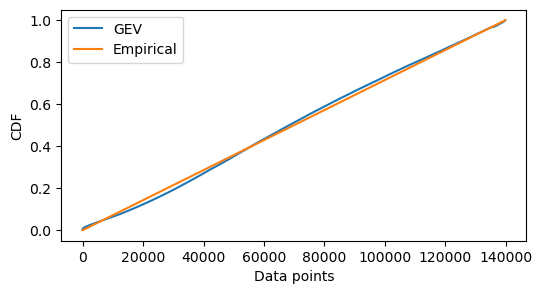

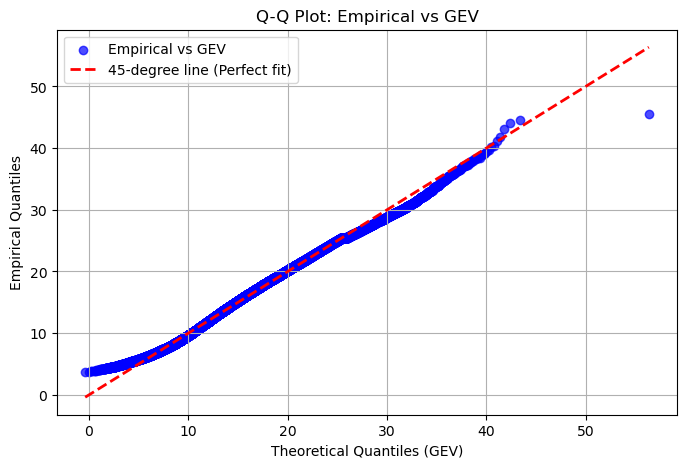

In [7]:
# Load data
all_ks = []
all_p = []
all_theroretical_quantiles = []
all_empirical_quantiles = []

without_storms = ''

type_of_climate = 'hm'

for i in range(0, 15):
    data = pd.read_csv(f'data/climatology_{type_of_climate}_winter_per_cluster{without_storms}/wind_data_cluster_{i}.csv', index_col=0).to_numpy().squeeze()#np.random.gumbel(0, 1, size=1000)  # Replace with your data
    print(f'Cluster {i}')
    # Step 1: Fit GEV distribution
    shape, loc, scale = stats.genextreme.fit(data)
    # Step 2: Evaluate GEV CDFs at "sorted" data points
    ## Sort data
    sorted_data = np.sort(data)
    ## Evaluate CDFs
    sorted_data_cdf = stats.genextreme.cdf(sorted_data, shape, loc, scale)
    # Take a look at the CDF
    fig,ax = plt.subplots(1,1,figsize=(6,3))
    ax.plot(sorted_data_cdf,label='GEV')
    ax.set_xlabel("Data points")
    ax.set_ylabel("CDF")
    plt.legend(loc=2)
    plt.show()
    # Step 3: Use the K-S test to compare the empirical CDF to the GEV CDF
    ks_stat, p_value = stats.kstest(data, "genextreme", args=(shape, loc, scale))

    print(f"K-S Statistic: {ks_stat}")
    print(f"P-Value: {p_value}")
    all_ks.append(ks_stat)
    all_p.append(p_value)

    # Visualisation
    # Step 1: Compute empirical CDF (num of points<xi/total num of points)
    ecdf = pd.read_csv(f'data/climatology_{type_of_climate}_winter_per_cluster{without_storms}/ECDF/ECDF_cluster_'+str(i)+'.csv', index_col=0).to_numpy().squeeze()
    # Take a look at the CDF
    fig,ax = plt.subplots(1,1,figsize=(6,3))
    ax.plot(sorted_data_cdf,label='GEV')
    ax.plot(ecdf, label='Empirical')
    ax.set_xlabel("Data points")
    ax.set_ylabel("CDF")
    plt.legend(loc=2)
    plt.show()

    # Quantile-Quantile plot
    # Step 1: Quantiles for empirical and GEV distributions

    # Empirical quantiles are the sorted data (2nd quantile: 2nd smaller number ...)
    empirical_quantiles = sorted_data
    all_empirical_quantiles.append(empirical_quantiles)

    # Theoretical quantiles (based on GEV) used .ppv to find the values corresponding to different quantiles in a fitted GEV distribution.
    # Step 2: Define a range of quantiles and compute theoretical quantiles
    #theoretical_quantiles = norm.ppf(ecdf, loc=loc, scale=scale)
    theoretical_quantiles = stats.genextreme.ppf(ecdf, shape, loc=loc, scale=scale)
    all_theroretical_quantiles.append(theoretical_quantiles)

    # Step 2: Create QQ Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(theoretical_quantiles, empirical_quantiles, color='blue', label='Empirical vs GEV', alpha=0.7)
    plt.plot(theoretical_quantiles, theoretical_quantiles, color='red', linestyle='--', label='45-degree line (Perfect fit)', lw=2)
    plt.title("Q-Q Plot: Empirical vs GEV")
    plt.xlabel("Theoretical Quantiles (GEV)")
    plt.ylabel("Empirical Quantiles")
    plt.legend()
    plt.grid()
    plt.show()


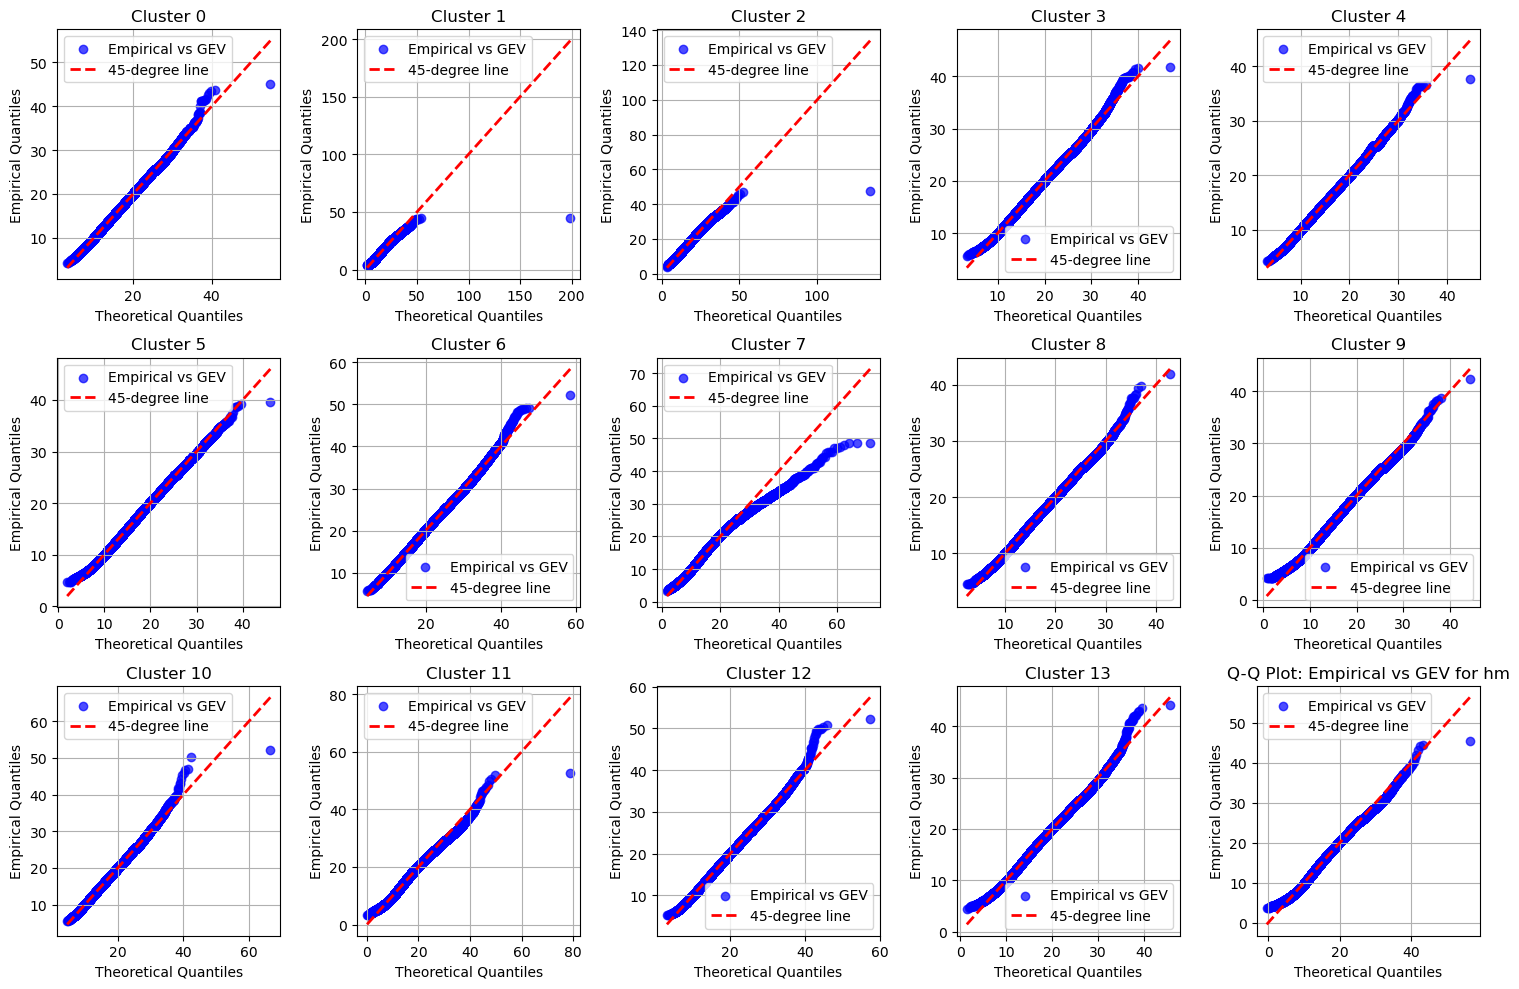

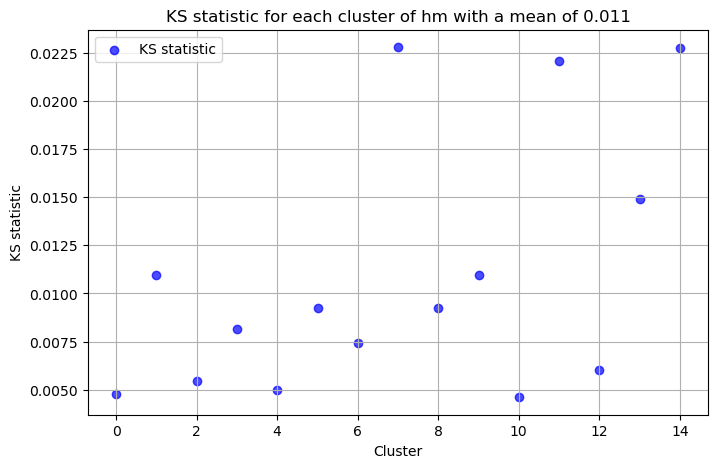

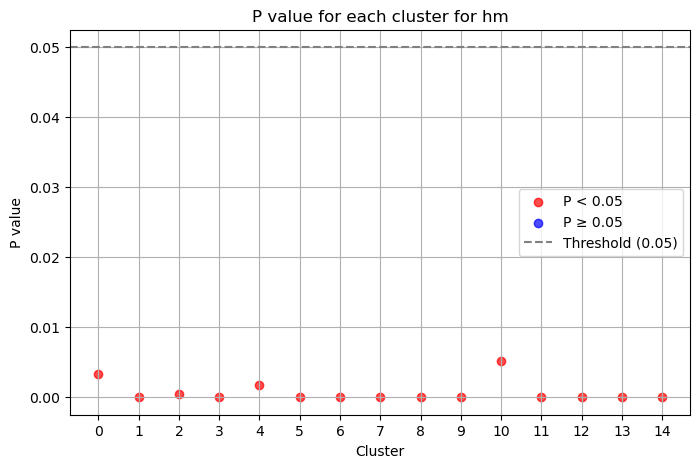

In [8]:
# Define the grid size
rows, cols = 3, 5  # Adjust based on your needs
fig, axes = plt.subplots(rows, cols, figsize=(15, 10), sharex=False, sharey=False)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each cluster and plot
for i in range(15):
    ax = axes[i]
    ax.scatter(all_theroretical_quantiles[i], all_empirical_quantiles[i], color='blue', label='Empirical vs GEV', alpha=0.7)
    ax.plot(all_theroretical_quantiles[i], all_theroretical_quantiles[i], color='red', linestyle='--', label='45-degree line', lw=2)
    ax.set_title(f"Cluster {i}")
    ax.set_xlabel("Theoretical Quantiles")
    ax.set_ylabel("Empirical Quantiles")
    ax.legend()
    ax.grid()

# Remove empty subplots if any
for j in range(len(axes)):
    if j >= 15:
        fig.delaxes(axes[j])

plt.title(f"Q-Q Plot: Empirical vs GEV for {type_of_climate}")
plt.tight_layout()
plt.savefig(f'pre_processing/GEV/figures{without_storms}/qq_plots_wind_{type_of_climate}.png')
plt.show()

# plot all ks and p values
plt.figure(figsize=(8, 5))
plt.scatter(range(0,15), all_ks, color='blue', label='KS statistic', alpha=0.7)
plt.title(f"KS statistic for each cluster of {type_of_climate} with a mean of " + str(round(np.mean(all_ks),3)))
plt.xlabel("Cluster")
plt.ylabel("KS statistic")
plt.legend()
plt.grid()
plt.savefig(f'pre_processing/GEV/figures{without_storms}/ks_statistic_wind_{type_of_climate}.png')
plt.show()

# Create subsets for p-values
below_threshold = [p if p < 0.05 else None for p in all_p]  # Highlighted points
above_threshold = [p if p >= 0.05 else None for p in all_p]  # Non-highlighted points

plt.figure(figsize=(8, 5))
# Scatter points below 0.05 in a different color
plt.scatter(range(0, 15), below_threshold, color='red', label='P < 0.05', alpha=0.7)
# Scatter other points
plt.scatter(range(0, 15), above_threshold, color='blue', label='P ≥ 0.05', alpha=0.7)

plt.title(f"P value for each cluster for {type_of_climate}")
plt.xlabel("Cluster")
plt.ylabel("P value")
plt.axhline(y=0.05, color='gray', linestyle='--', label='Threshold (0.05)')  # Add a threshold line
plt.xticks(range(0, 15))
plt.legend()
plt.grid()
plt.savefig(f'pre_processing/GEV/figures{without_storms}/p_value_wind_{type_of_climate}.png')
plt.show()


In [90]:
# Step 1: Fit GEV distribution
shape, loc, scale = stats.genextreme.fit(data)

In [91]:
# Step 2: Evaluate GEV CDFs at "sorted" data points
## Sort data
sorted_data = np.sort(data)
## Evaluate CDFs
sorted_data_cdf = stats.genextreme.cdf(sorted_data, shape, loc, scale)
#sorted_data_cdf = pd.read_csv('data/GEV_CDF/CDF_cluster_3.csv', index_col=0)

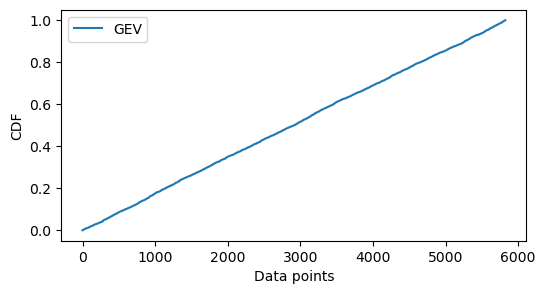

In [92]:
# Take a look at the CDF
fig,ax = plt.subplots(1,1,figsize=(6,3))
ax.plot(sorted_data_cdf,label='GEV')
ax.set_xlabel("Data points")
ax.set_ylabel("CDF")
plt.legend(loc=2)
plt.show()

Some useful statistical metrics after applying a K-S test provided by the scipy implementation is the (1) K-S Statistic, and (2) p-value.

The K-S statistic measures the maximum difference between two CDFs, whereas the p-value quantifies the statistical significance of the CDF differences.

In our case, we would like to prove that the empiral CDF is similar to the GEV CDF. As a result, we would like the K-S statistic to be as large as possible. In terms of statistical significance, a threshold of 0.05 is commonly used to determine whether the null hypothesis (the GEV fits the underlying distribution well) should be rejected or not. A p-value smaller than 0.05 means that the GEV CDF is very different from the empirical one, whereas p-values higher than 0.05 means the opposite (what we want).

In [93]:
# Step 3: Use the K-S test to compare the empirical CDF to the GEV CDF
ks_stat, p_value = stats.kstest(data, "genextreme", args=(shape, loc, scale))

print(f"K-S Statistic: {ks_stat}")
print(f"P-Value: {p_value}")

K-S Statistic: 0.009989572662086221
P-Value: 0.602773897460404


The K-S test shows that the data we created can be modelled with GEV distributions.

## 2. Visual inspection

In [94]:
# Step 1: Compute empirical CDF (num of points<xi/total num of points)
ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

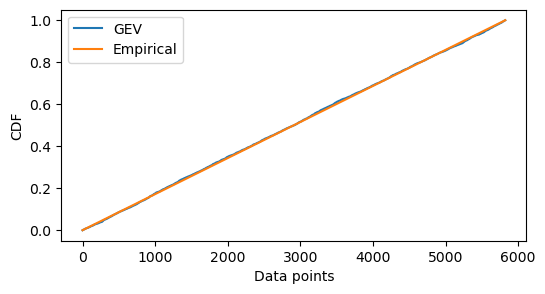

In [95]:
# Take a look at the CDF
fig,ax = plt.subplots(1,1,figsize=(6,3))
ax.plot(sorted_data_cdf,label='GEV')
ax.plot(ecdf, label='Empirical')
ax.set_xlabel("Data points")
ax.set_ylabel("CDF")
plt.legend(loc=2)
plt.show()

## 3. Quantile-Quantile plot

Quantile-quantile answers the following question: how close is the 50th (or 40th, really any number...) percentile of the GEV distribution to the 50th percentile (or 40th, ....) of the empirical distibution?

In [96]:
# Step 1: Quantiles for empirical and GEV distributions

# Empirical quantiles are the sorted data (2nd quantile: 2nd smaller number ...)
empirical_quantiles = sorted_data

# Theoretical quantiles (based on GEV) used .ppv to find the values corresponding to different quantiles in a fitted GEV distribution.
theoretical_quantiles = stats.genextreme.ppf(ecdf, shape, loc=loc, scale=scale)


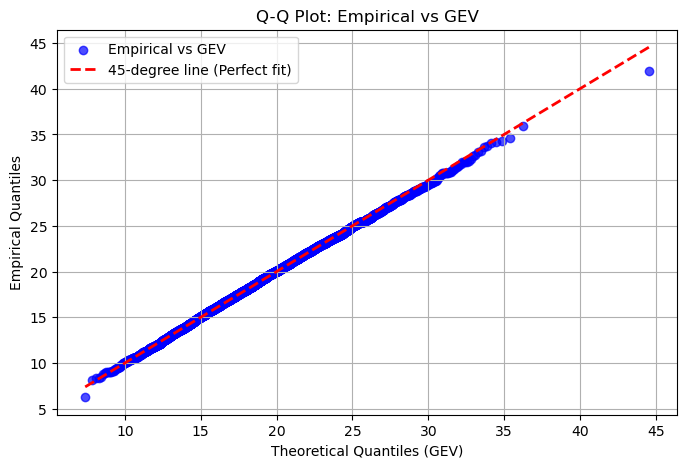

In [97]:
# Step 2: Create QQ Plot
plt.figure(figsize=(8, 5))
plt.scatter(theoretical_quantiles, empirical_quantiles, color='blue', label='Empirical vs GEV', alpha=0.7)
plt.plot(theoretical_quantiles, theoretical_quantiles, color='red', linestyle='--', label='45-degree line (Perfect fit)', lw=2)
plt.title("Q-Q Plot: Empirical vs GEV")
plt.xlabel("Theoretical Quantiles (GEV)")
plt.ylabel("Empirical Quantiles")
plt.legend()
plt.grid()
plt.show()